# Chapter 8: Support Vector Machines

## 8.1 Introduction

development is attributed to Vladimir Vapnik


## 8.2 Motivation and Scope

- Original SVM algorithm: solution if simple binary classification problem
- separate two calsses with maxima separation using select number of data points (support vectors)
- hyperplane: optimally separates two classes, tries to maximize the distance between the class boundaries
- drastic reduction in the amount of information that needs to be preserved for classification

### 8.2.1 Extension to Muti-class Classification

- separate each pair of classes from the given multi-class problem
- apply some heurisitc to predict the class for each sample
$\Rightarrow$ time-consuming, complexity increases polynomially

- separate each class from the rest of the classes
$\Rightarrow$ complexity increases linear


## 8.3 Theory of SVM

## 8.4 Separability and Margins

- designed to separate classes that are in fact completely separable 
- in practice seldom found
- Introduction if *soft* SVMs


## 8.5 Implementing Linear SVMs



In [1]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [2]:
from sklearn import svm

svmc = svm.SVC(kernel="linear")
svmc.fit(X, y)
y_pred = svmc.predict(X=X)
svmc.score(X=X, y=y)


0.9933333333333333

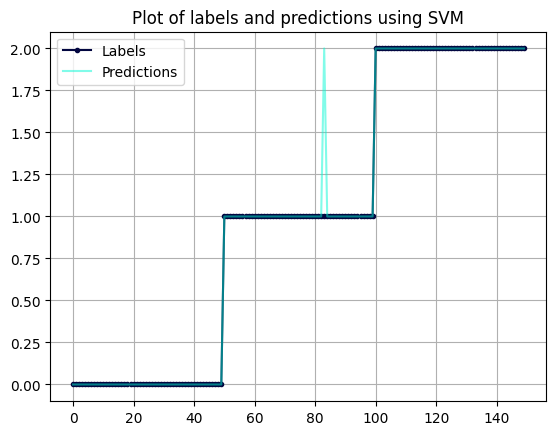

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.title('Plot of labels and predictions using SVM')
ax1.plot(y, color = "#020640", marker = ".", label = "Labels")
ax1.plot(y_pred, color = "#05f9d4", label = "Predictions", alpha = .5)
plt.legend(loc = 'upper left')
plt.grid(True)
plt.show()

## 8.6 Nonlinearity and Use of Kernels


## 8.7 Implementing Nonlinear SVMs with Kernels

nonlinear kernels do not work well on linear kernels

In [4]:
svmc_rbf = svm.SVC(kernel="rbf")
svmc_rbf.fit(X=X, y=y)
y_pred_rbf = svmc_rbf.predict(X)
svmc_rbf.score(X, y)


0.9733333333333334

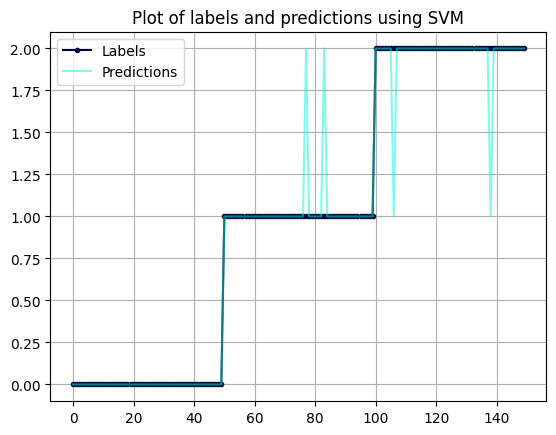

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.title('Plot of labels and predictions using SVM')
ax1.plot(y, color = "#020640", marker = ".", label = "Labels")
ax1.plot(y_pred_rbf, color = "#05f9d4", label = "Predictions", alpha = .5)
plt.legend(loc = 'upper left')
plt.grid(True)
plt.show()

## 8.8 Risk Minimization

## 8.10 Exercises

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

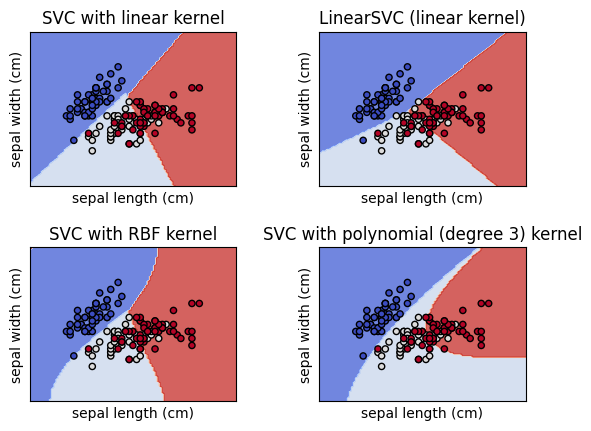

In [7]:
from sklearn.inspection import DecisionBoundaryDisplay

X = iris.data[:, :2]
y = iris.target


models = (svm.SVC(kernel="linear"),
          svm.LinearSVC(max_iter=10000, dual="auto"),
          svm.SVC(kernel="rbf", gamma="auto"),
          svm.SVC(kernel="poly", degree=3, gamma="auto"))

models = (clf.fit(X=X, y=y) for clf in models)

titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()